# 人脸生成（Face Generation）
在该项目中，你将使用生成式对抗网络（Generative Adversarial Nets）来生成新的人脸图像。
### 获取数据
该项目将使用以下数据集：
- MNIST
- CelebA

由于 CelebA 数据集比较复杂，而且这是你第一次使用 GANs。我们想让你先在 MNIST 数据集上测试你的 GANs 模型，以让你更快的评估所建立模型的性能。

如果你在使用 [FloydHub](https://www.floydhub.com/), 请将 `data_dir` 设置为 "/input" 并使用 [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = '/data'
!pip install matplotlib==2.0.2
# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

    100% |████████████████████████████████| 14.6MB 47kB/s  eta 0:00:01
  Found existing installation: matplotlib 2.1.0
    Uninstalling matplotlib-2.1.0:
      Successfully uninstalled matplotlib-2.1.0
You are using pip version 9.0.1, however version 18.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
Found mnist Data
Found celeba Data


## 探索数据（Explore the Data）
### MNIST
[MNIST](http://yann.lecun.com/exdb/mnist/) 是一个手写数字的图像数据集。你可以更改 `show_n_images` 探索此数据集。

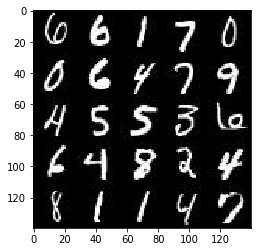

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
[CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) 是一个包含 20 多万张名人图片及相关图片说明的数据集。你将用此数据集生成人脸，不会用不到相关说明。你可以更改 `show_n_images` 探索此数据集。

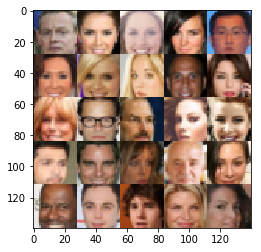

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## 预处理数据（Preprocess the Data）
由于该项目的重点是建立 GANs 模型，我们将为你预处理数据。

经过数据预处理，MNIST 和 CelebA 数据集的值在 28×28 维度图像的 [-0.5, 0.5] 范围内。CelebA 数据集中的图像裁剪了非脸部的图像部分，然后调整到 28x28 维度。

MNIST 数据集中的图像是单[通道](https://en.wikipedia.org/wiki/Channel_(digital_image%29)的黑白图像，CelebA 数据集中的图像是 [三通道的 RGB 彩色图像](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images)。

## 建立神经网络（Build the Neural Network）
你将通过部署以下函数来建立 GANs 的主要组成部分:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### 检查 TensorFlow 版本并获取 GPU 型号
检查你是否使用正确的 TensorFlow 版本，并获取 GPU 型号

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.3.0
Default GPU Device: /gpu:0


### 输入（Input）
部署 `model_inputs` 函数以创建用于神经网络的 [占位符 (TF Placeholders)](https://www.tensorflow.org/versions/r0.11/api_docs/python/io_ops/placeholders)。请创建以下占位符：
- 输入图像占位符: 使用 `image_width`，`image_height` 和 `image_channels` 设置为 rank 4。
- 输入 Z 占位符: 设置为 rank 2，并命名为 `z_dim`。
- 学习速率占位符: 设置为 rank 0。

返回占位符元组的形状为 (tensor of real input images, tensor of z data, learning rate)。


In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels))
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_dim')
    learning_rate = tf.placeholder(tf.float32)

    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.framework.ops.Operation'>):
<tf.Operation 'assert_rank_2/Assert/Assert' type=Assert>
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
['File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main\n    "__main__", mod_spec)', 'File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code\n    exec(code, run_globals)', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>\n    app.launch_new_instance()', 'File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance\n    app.start()', 'File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start\n    self.io_loop.start()', 'File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start\n    super(ZMQIOLoop, self).start()', 'File "/opt/co

### 辨别器（Discriminator）
部署 `discriminator` 函数创建辨别器神经网络以辨别 `images`。该函数应能够重复使用神经网络中的各种变量。 在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "discriminator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回形如 (tensor output of the discriminator, tensor logits of the discriminator) 的元组。

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param image: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.2
    drop = 0.9
    with tf.variable_scope('discriminator', reuse=reuse):
        
        layer1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same')
        relu1 = tf.maximum(alpha*layer1, layer1)
        drop1 = tf.nn.dropout(relu1, drop)
        # 14x14x64
        
        layer2 = tf.layers.conv2d(drop1, 128, 5, strides=2, padding='same')
        bn2 = tf.layers.batch_normalization(layer2, training=True)
        relu2 = tf.maximum(alpha*bn2, bn2)
        drop2 = tf.nn.dropout(relu2, drop)
        #7x7x128
        
        layer3 = tf.layers.conv2d(drop2, 256, 5, strides=2, padding='same')
        bn3 = tf.layers.batch_normalization(layer3, training=True)
        relu3 = tf.maximum(alpha*bn3, bn3)
        drop3 = tf.nn.dropout(relu3, drop)
        #4x4x256
        
        flat = tf.reshape(drop3, (-1, 4*4*256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)

        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### 生成器（Generator）
部署 `generator` 函数以使用 `z` 生成图像。该函数应能够重复使用神经网络中的各种变量。
在 [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) 中使用 "generator" 的变量空间名来重复使用该函数中的变量。 

该函数应返回所生成的 28 x 28 x `out_channel_dim` 维度图像。

In [34]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    alpha = 0.2
    with tf.variable_scope('generator', reuse= not is_train):
        
        x1 = tf.layers.dense(z, 4*4*512)
        
        x1 = tf.reshape(x1, (-1, 4, 4, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha*x1, x1)
        # 4x4x512
        
        x2 = tf.layers.conv2d_transpose(x1, 256, 4, strides=1, padding='valid')
        x2 = tf.layers.batch_normalization(x2, training=is_train)
        x2 = tf.maximum(alpha*x2, x2)
        # 7x7x256
        
        x3 = tf.layers.conv2d_transpose(x2, 128, 5, strides=2, padding='same')
        x3 = tf.layers.batch_normalization(x3, training=is_train)
        x3 = tf.maximum(alpha*x3, x3)
        # 14x14x128
        
        logits = tf.layers.conv2d_transpose(x3, out_channel_dim, 5, strides=2, padding='same')
        # 28x28xout_dim
        
        out = tf.tanh(logits)
        
        return out/2


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### 损失函数（Loss）
部署 `model_loss` 函数训练并计算 GANs 的损失。该函数应返回形如 (discriminator loss, generator loss) 的元组。

使用你已实现的函数：
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [35]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    smooth = 0.1
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*(1 - smooth)))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake
    
    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### 优化（Optimization）
部署 `model_opt` 函数实现对 GANs 的优化。使用 [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) 获取可训练的所有变量。通过变量空间名 `discriminator` 和 `generator` 来过滤变量。该函数应返回形如 (discriminator training operation, generator training operation) 的元组。

In [36]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## 训练神经网络（Neural Network Training）
### 输出显示
使用该函数可以显示生成器 (Generator) 在训练过程中的当前输出，这会帮你评估 GANs 模型的训练程度。

In [37]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### 训练
部署 `train` 函数以建立并训练 GANs 模型。记得使用以下你已完成的函数：
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

使用 `show_generator_output` 函数显示 `generator` 在训练过程中的输出。

**注意**：在每个批次 (batch) 中运行 `show_generator_output` 函数会显著增加训练时间与该 notebook 的体积。推荐每 100 批次输出一次 `generator` 的输出。 

In [38]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    channle_dim = 1
    if (data_image_mode == 'RGB'):
        channle_dim = 3
    input_real, input_z, learn_rate = model_inputs(28, 28, channle_dim, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channle_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    n_step = 0
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                
                n_step = n_step + 1
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                
                _= sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _= sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                
                if (n_step % 10 == 0):
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                
                if (n_step % 100 == 0):
                    show_generator_output(sess, batch_size, tf.convert_to_tensor(batch_z, dtype=tf.float32), channle_dim, data_image_mode)
                
                

### MNIST
在 MNIST 上测试你的 GANs 模型。经过 2 次迭代，GANs 应该能够生成类似手写数字的图像。确保生成器 (generator) 低于辨别器 (discriminator) 的损失，或接近 0。

Epoch 1/2... Discriminator Loss: 2.5927... Generator Loss: 5.8466
Epoch 1/2... Discriminator Loss: 0.7513... Generator Loss: 1.6803
Epoch 1/2... Discriminator Loss: 0.9653... Generator Loss: 1.1258
Epoch 1/2... Discriminator Loss: 0.5306... Generator Loss: 2.3284
Epoch 1/2... Discriminator Loss: 1.2327... Generator Loss: 1.9202
Epoch 1/2... Discriminator Loss: 0.4349... Generator Loss: 3.9815
Epoch 1/2... Discriminator Loss: 0.7888... Generator Loss: 2.3488
Epoch 1/2... Discriminator Loss: 1.3861... Generator Loss: 1.2158
Epoch 1/2... Discriminator Loss: 0.9576... Generator Loss: 0.9749
Epoch 1/2... Discriminator Loss: 1.9517... Generator Loss: 0.4398


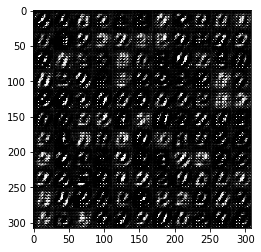

Epoch 1/2... Discriminator Loss: 0.9898... Generator Loss: 1.0495
Epoch 1/2... Discriminator Loss: 1.0113... Generator Loss: 1.4624
Epoch 1/2... Discriminator Loss: 1.1431... Generator Loss: 0.7752
Epoch 1/2... Discriminator Loss: 2.2649... Generator Loss: 1.3906
Epoch 1/2... Discriminator Loss: 2.6934... Generator Loss: 3.9015
Epoch 1/2... Discriminator Loss: 1.3366... Generator Loss: 2.2608
Epoch 1/2... Discriminator Loss: 1.2519... Generator Loss: 1.4338
Epoch 1/2... Discriminator Loss: 1.4647... Generator Loss: 1.8908
Epoch 1/2... Discriminator Loss: 1.2144... Generator Loss: 1.3411
Epoch 1/2... Discriminator Loss: 1.3222... Generator Loss: 0.8417


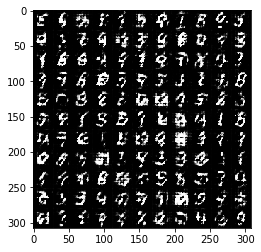

Epoch 1/2... Discriminator Loss: 1.7295... Generator Loss: 0.5572
Epoch 1/2... Discriminator Loss: 1.5373... Generator Loss: 2.0296
Epoch 1/2... Discriminator Loss: 1.3164... Generator Loss: 1.8958
Epoch 1/2... Discriminator Loss: 1.8117... Generator Loss: 2.7375
Epoch 1/2... Discriminator Loss: 1.1910... Generator Loss: 0.7647
Epoch 1/2... Discriminator Loss: 0.6331... Generator Loss: 1.6462
Epoch 1/2... Discriminator Loss: 1.3456... Generator Loss: 0.6199
Epoch 1/2... Discriminator Loss: 1.6240... Generator Loss: 0.7470
Epoch 1/2... Discriminator Loss: 1.4297... Generator Loss: 1.4264
Epoch 1/2... Discriminator Loss: 1.2036... Generator Loss: 1.3123


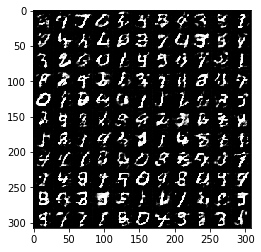

Epoch 1/2... Discriminator Loss: 1.5683... Generator Loss: 2.3408
Epoch 1/2... Discriminator Loss: 1.2361... Generator Loss: 1.3985
Epoch 1/2... Discriminator Loss: 1.2254... Generator Loss: 0.9944
Epoch 1/2... Discriminator Loss: 1.7624... Generator Loss: 0.3630
Epoch 1/2... Discriminator Loss: 1.1832... Generator Loss: 0.7946
Epoch 1/2... Discriminator Loss: 1.8378... Generator Loss: 0.2947
Epoch 1/2... Discriminator Loss: 1.3679... Generator Loss: 0.5546
Epoch 1/2... Discriminator Loss: 1.3354... Generator Loss: 0.7041
Epoch 1/2... Discriminator Loss: 1.1222... Generator Loss: 1.0527
Epoch 1/2... Discriminator Loss: 1.2811... Generator Loss: 0.7695


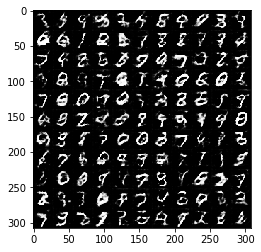

Epoch 1/2... Discriminator Loss: 1.2954... Generator Loss: 1.4064
Epoch 1/2... Discriminator Loss: 1.3325... Generator Loss: 0.8050
Epoch 1/2... Discriminator Loss: 1.4223... Generator Loss: 0.5787
Epoch 1/2... Discriminator Loss: 1.3845... Generator Loss: 0.5950
Epoch 1/2... Discriminator Loss: 1.4839... Generator Loss: 0.5123
Epoch 1/2... Discriminator Loss: 1.1643... Generator Loss: 1.1394
Epoch 2/2... Discriminator Loss: 1.1625... Generator Loss: 1.1121
Epoch 2/2... Discriminator Loss: 1.4052... Generator Loss: 0.6328
Epoch 2/2... Discriminator Loss: 1.5088... Generator Loss: 0.4792
Epoch 2/2... Discriminator Loss: 1.2773... Generator Loss: 0.9699


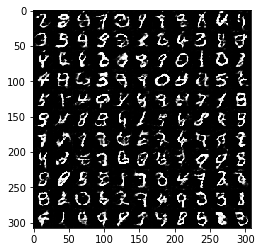

Epoch 2/2... Discriminator Loss: 1.9403... Generator Loss: 2.4888
Epoch 2/2... Discriminator Loss: 1.1731... Generator Loss: 1.0660
Epoch 2/2... Discriminator Loss: 1.7514... Generator Loss: 2.2813
Epoch 2/2... Discriminator Loss: 1.3379... Generator Loss: 0.7236
Epoch 2/2... Discriminator Loss: 1.3918... Generator Loss: 0.6944
Epoch 2/2... Discriminator Loss: 1.3091... Generator Loss: 1.2975
Epoch 2/2... Discriminator Loss: 1.2500... Generator Loss: 0.8758
Epoch 2/2... Discriminator Loss: 1.6715... Generator Loss: 0.4034
Epoch 2/2... Discriminator Loss: 1.2759... Generator Loss: 1.0744
Epoch 2/2... Discriminator Loss: 1.4784... Generator Loss: 2.0614


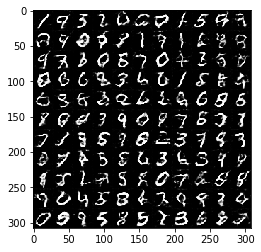

Epoch 2/2... Discriminator Loss: 1.1840... Generator Loss: 1.1749
Epoch 2/2... Discriminator Loss: 1.4988... Generator Loss: 0.4821
Epoch 2/2... Discriminator Loss: 1.2924... Generator Loss: 0.7868
Epoch 2/2... Discriminator Loss: 1.2268... Generator Loss: 0.8525
Epoch 2/2... Discriminator Loss: 1.2416... Generator Loss: 0.8911
Epoch 2/2... Discriminator Loss: 1.5665... Generator Loss: 0.4379
Epoch 2/2... Discriminator Loss: 1.2755... Generator Loss: 0.6703
Epoch 2/2... Discriminator Loss: 1.4018... Generator Loss: 0.5261
Epoch 2/2... Discriminator Loss: 1.3796... Generator Loss: 0.5682
Epoch 2/2... Discriminator Loss: 1.2273... Generator Loss: 0.9967


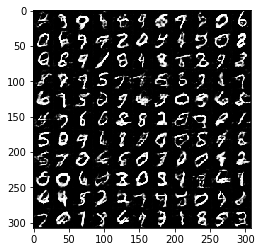

Epoch 2/2... Discriminator Loss: 1.2209... Generator Loss: 1.1054
Epoch 2/2... Discriminator Loss: 1.5435... Generator Loss: 1.9554
Epoch 2/2... Discriminator Loss: 1.1920... Generator Loss: 1.1154
Epoch 2/2... Discriminator Loss: 1.1968... Generator Loss: 1.4700
Epoch 2/2... Discriminator Loss: 1.3426... Generator Loss: 0.7873
Epoch 2/2... Discriminator Loss: 1.4443... Generator Loss: 0.5356
Epoch 2/2... Discriminator Loss: 1.1663... Generator Loss: 0.9048
Epoch 2/2... Discriminator Loss: 1.2203... Generator Loss: 1.3202
Epoch 2/2... Discriminator Loss: 1.3058... Generator Loss: 1.0667
Epoch 2/2... Discriminator Loss: 1.1555... Generator Loss: 1.1433


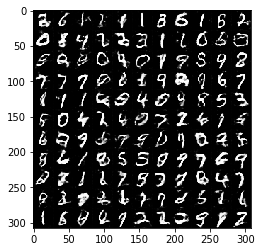

Epoch 2/2... Discriminator Loss: 1.2553... Generator Loss: 0.7959
Epoch 2/2... Discriminator Loss: 1.5266... Generator Loss: 0.4819
Epoch 2/2... Discriminator Loss: 1.3812... Generator Loss: 0.6162
Epoch 2/2... Discriminator Loss: 1.3004... Generator Loss: 0.7808
Epoch 2/2... Discriminator Loss: 1.6009... Generator Loss: 0.3988
Epoch 2/2... Discriminator Loss: 1.1618... Generator Loss: 1.2396
Epoch 2/2... Discriminator Loss: 2.1046... Generator Loss: 2.3919
Epoch 2/2... Discriminator Loss: 1.3166... Generator Loss: 0.8846
Epoch 2/2... Discriminator Loss: 1.4794... Generator Loss: 1.6467
Epoch 2/2... Discriminator Loss: 1.3586... Generator Loss: 0.6669


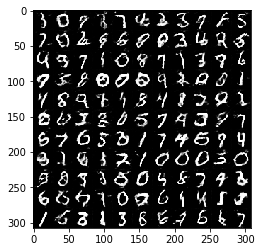

Epoch 2/2... Discriminator Loss: 1.2105... Generator Loss: 0.7204
Epoch 2/2... Discriminator Loss: 1.2548... Generator Loss: 0.8909
Epoch 2/2... Discriminator Loss: 1.8212... Generator Loss: 0.3275


In [39]:
batch_size = 128
z_dim = 100
learning_rate = 0.003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
在 CelebA 上运行你的 GANs 模型。在一般的GPU上运行每次迭代大约需要 20 分钟。你可以运行整个迭代，或者当 GANs 开始产生真实人脸图像时停止它。

Epoch 1/1... Discriminator Loss: 3.1476... Generator Loss: 0.1087
Epoch 1/1... Discriminator Loss: 1.5531... Generator Loss: 0.7140
Epoch 1/1... Discriminator Loss: 1.1321... Generator Loss: 1.1549
Epoch 1/1... Discriminator Loss: 1.0218... Generator Loss: 1.7255
Epoch 1/1... Discriminator Loss: 1.5622... Generator Loss: 0.5516
Epoch 1/1... Discriminator Loss: 1.0602... Generator Loss: 1.2036
Epoch 1/1... Discriminator Loss: 1.0718... Generator Loss: 5.5550
Epoch 1/1... Discriminator Loss: 1.1091... Generator Loss: 0.8247
Epoch 1/1... Discriminator Loss: 1.0630... Generator Loss: 1.6483
Epoch 1/1... Discriminator Loss: 1.0127... Generator Loss: 1.0965


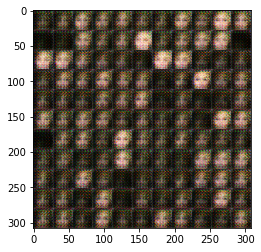

Epoch 1/1... Discriminator Loss: 1.1262... Generator Loss: 0.9015
Epoch 1/1... Discriminator Loss: 1.5189... Generator Loss: 0.4793
Epoch 1/1... Discriminator Loss: 1.4616... Generator Loss: 1.2893
Epoch 1/1... Discriminator Loss: 0.9382... Generator Loss: 2.1210
Epoch 1/1... Discriminator Loss: 1.0380... Generator Loss: 0.9999
Epoch 1/1... Discriminator Loss: 1.4341... Generator Loss: 1.9802
Epoch 1/1... Discriminator Loss: 1.5287... Generator Loss: 0.9190
Epoch 1/1... Discriminator Loss: 1.7063... Generator Loss: 1.9372
Epoch 1/1... Discriminator Loss: 1.2666... Generator Loss: 1.0726
Epoch 1/1... Discriminator Loss: 1.3047... Generator Loss: 1.0394


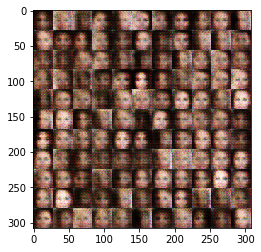

Epoch 1/1... Discriminator Loss: 1.5850... Generator Loss: 0.5373
Epoch 1/1... Discriminator Loss: 1.6607... Generator Loss: 0.4497
Epoch 1/1... Discriminator Loss: 1.1650... Generator Loss: 0.8322
Epoch 1/1... Discriminator Loss: 1.2313... Generator Loss: 0.8641
Epoch 1/1... Discriminator Loss: 1.3905... Generator Loss: 0.9027
Epoch 1/1... Discriminator Loss: 1.2973... Generator Loss: 0.9069
Epoch 1/1... Discriminator Loss: 1.2975... Generator Loss: 0.6657
Epoch 1/1... Discriminator Loss: 1.2432... Generator Loss: 0.8050
Epoch 1/1... Discriminator Loss: 1.6897... Generator Loss: 0.4018
Epoch 1/1... Discriminator Loss: 1.1861... Generator Loss: 1.0267


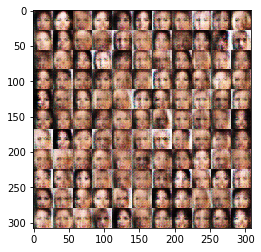

Epoch 1/1... Discriminator Loss: 1.2406... Generator Loss: 0.8634
Epoch 1/1... Discriminator Loss: 1.5119... Generator Loss: 0.5285
Epoch 1/1... Discriminator Loss: 1.8387... Generator Loss: 0.3270
Epoch 1/1... Discriminator Loss: 1.7351... Generator Loss: 0.3952
Epoch 1/1... Discriminator Loss: 1.2645... Generator Loss: 1.4467
Epoch 1/1... Discriminator Loss: 1.7096... Generator Loss: 0.4130
Epoch 1/1... Discriminator Loss: 1.3328... Generator Loss: 0.6513
Epoch 1/1... Discriminator Loss: 1.1720... Generator Loss: 1.3892
Epoch 1/1... Discriminator Loss: 1.4732... Generator Loss: 0.4957
Epoch 1/1... Discriminator Loss: 1.2677... Generator Loss: 1.0352


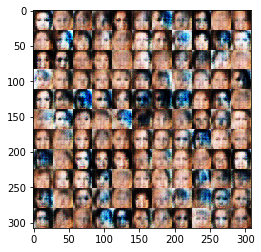

Epoch 1/1... Discriminator Loss: 1.4324... Generator Loss: 0.5825
Epoch 1/1... Discriminator Loss: 1.4572... Generator Loss: 0.5410
Epoch 1/1... Discriminator Loss: 1.5017... Generator Loss: 0.5360
Epoch 1/1... Discriminator Loss: 1.2663... Generator Loss: 0.9406
Epoch 1/1... Discriminator Loss: 1.3302... Generator Loss: 0.8745
Epoch 1/1... Discriminator Loss: 1.2478... Generator Loss: 0.8856
Epoch 1/1... Discriminator Loss: 1.2972... Generator Loss: 0.7652
Epoch 1/1... Discriminator Loss: 1.5411... Generator Loss: 1.1650
Epoch 1/1... Discriminator Loss: 1.2182... Generator Loss: 1.1165
Epoch 1/1... Discriminator Loss: 1.3938... Generator Loss: 1.3124


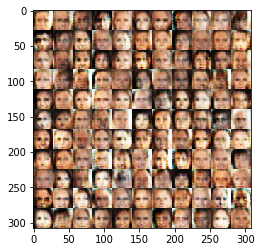

Epoch 1/1... Discriminator Loss: 1.3406... Generator Loss: 0.6744
Epoch 1/1... Discriminator Loss: 1.4676... Generator Loss: 0.5229
Epoch 1/1... Discriminator Loss: 1.3019... Generator Loss: 0.9991
Epoch 1/1... Discriminator Loss: 1.3199... Generator Loss: 1.1465
Epoch 1/1... Discriminator Loss: 1.3548... Generator Loss: 1.2011
Epoch 1/1... Discriminator Loss: 1.3095... Generator Loss: 1.3720
Epoch 1/1... Discriminator Loss: 1.1889... Generator Loss: 1.2885
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 0.8729
Epoch 1/1... Discriminator Loss: 1.2904... Generator Loss: 0.8113
Epoch 1/1... Discriminator Loss: 1.2706... Generator Loss: 0.9686


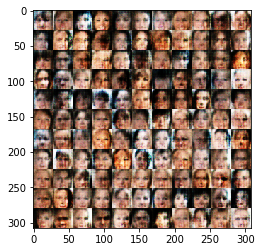

Epoch 1/1... Discriminator Loss: 1.4241... Generator Loss: 1.3547
Epoch 1/1... Discriminator Loss: 1.2646... Generator Loss: 1.1518
Epoch 1/1... Discriminator Loss: 1.1968... Generator Loss: 1.0274
Epoch 1/1... Discriminator Loss: 1.3002... Generator Loss: 1.0719
Epoch 1/1... Discriminator Loss: 1.2424... Generator Loss: 0.9260
Epoch 1/1... Discriminator Loss: 2.0977... Generator Loss: 0.2326
Epoch 1/1... Discriminator Loss: 1.4378... Generator Loss: 0.6715
Epoch 1/1... Discriminator Loss: 1.1609... Generator Loss: 0.9134
Epoch 1/1... Discriminator Loss: 1.0427... Generator Loss: 1.0863
Epoch 1/1... Discriminator Loss: 1.3579... Generator Loss: 1.1967


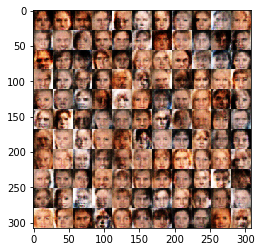

Epoch 1/1... Discriminator Loss: 1.2195... Generator Loss: 0.8747
Epoch 1/1... Discriminator Loss: 1.2730... Generator Loss: 1.0924
Epoch 1/1... Discriminator Loss: 1.1654... Generator Loss: 1.8636
Epoch 1/1... Discriminator Loss: 1.3013... Generator Loss: 1.1047
Epoch 1/1... Discriminator Loss: 1.0525... Generator Loss: 1.1082
Epoch 1/1... Discriminator Loss: 0.8375... Generator Loss: 1.3887
Epoch 1/1... Discriminator Loss: 0.8333... Generator Loss: 1.6296
Epoch 1/1... Discriminator Loss: 1.1976... Generator Loss: 1.7497
Epoch 1/1... Discriminator Loss: 1.3801... Generator Loss: 0.8999
Epoch 1/1... Discriminator Loss: 1.2748... Generator Loss: 0.7970


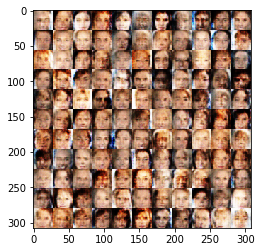

Epoch 1/1... Discriminator Loss: 1.1391... Generator Loss: 1.5011
Epoch 1/1... Discriminator Loss: 1.4358... Generator Loss: 0.7700
Epoch 1/1... Discriminator Loss: 1.1364... Generator Loss: 1.0017
Epoch 1/1... Discriminator Loss: 1.5853... Generator Loss: 0.4086
Epoch 1/1... Discriminator Loss: 0.7211... Generator Loss: 1.4495
Epoch 1/1... Discriminator Loss: 1.5909... Generator Loss: 0.7174
Epoch 1/1... Discriminator Loss: 1.3272... Generator Loss: 0.8824
Epoch 1/1... Discriminator Loss: 0.8535... Generator Loss: 1.2205
Epoch 1/1... Discriminator Loss: 1.4918... Generator Loss: 1.0035
Epoch 1/1... Discriminator Loss: 1.3075... Generator Loss: 0.8365


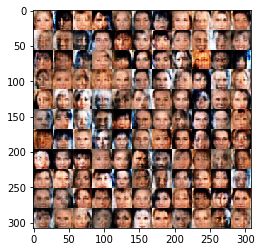

Epoch 1/1... Discriminator Loss: 1.2995... Generator Loss: 0.7388
Epoch 1/1... Discriminator Loss: 1.3704... Generator Loss: 1.5818
Epoch 1/1... Discriminator Loss: 2.9673... Generator Loss: 3.8580
Epoch 1/1... Discriminator Loss: 1.3660... Generator Loss: 1.0350
Epoch 1/1... Discriminator Loss: 1.3015... Generator Loss: 0.8441
Epoch 1/1... Discriminator Loss: 1.1069... Generator Loss: 1.6598
Epoch 1/1... Discriminator Loss: 1.3782... Generator Loss: 0.4993
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 1.0424
Epoch 1/1... Discriminator Loss: 1.2356... Generator Loss: 0.7316
Epoch 1/1... Discriminator Loss: 1.2774... Generator Loss: 0.8064


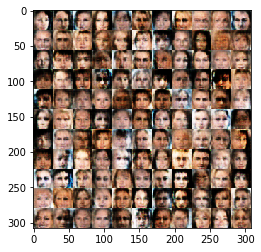

Epoch 1/1... Discriminator Loss: 1.3339... Generator Loss: 0.6486
Epoch 1/1... Discriminator Loss: 1.2609... Generator Loss: 1.0459
Epoch 1/1... Discriminator Loss: 1.2963... Generator Loss: 0.8096
Epoch 1/1... Discriminator Loss: 1.3537... Generator Loss: 0.6413
Epoch 1/1... Discriminator Loss: 1.7660... Generator Loss: 0.3220
Epoch 1/1... Discriminator Loss: 0.9821... Generator Loss: 1.2028
Epoch 1/1... Discriminator Loss: 1.3342... Generator Loss: 0.8462
Epoch 1/1... Discriminator Loss: 1.2361... Generator Loss: 0.9324
Epoch 1/1... Discriminator Loss: 1.1499... Generator Loss: 0.8427
Epoch 1/1... Discriminator Loss: 0.9190... Generator Loss: 2.2937


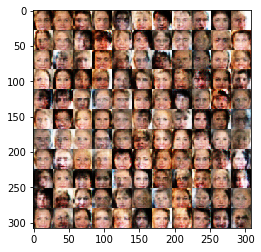

Epoch 1/1... Discriminator Loss: 1.1242... Generator Loss: 1.0969
Epoch 1/1... Discriminator Loss: 1.3789... Generator Loss: 0.8620
Epoch 1/1... Discriminator Loss: 1.2960... Generator Loss: 0.9342
Epoch 1/1... Discriminator Loss: 1.3573... Generator Loss: 0.5790
Epoch 1/1... Discriminator Loss: 1.0368... Generator Loss: 2.3193
Epoch 1/1... Discriminator Loss: 1.2490... Generator Loss: 0.8988
Epoch 1/1... Discriminator Loss: 1.3036... Generator Loss: 0.8740
Epoch 1/1... Discriminator Loss: 1.3246... Generator Loss: 0.6030
Epoch 1/1... Discriminator Loss: 1.7290... Generator Loss: 2.4682
Epoch 1/1... Discriminator Loss: 0.9801... Generator Loss: 1.8691


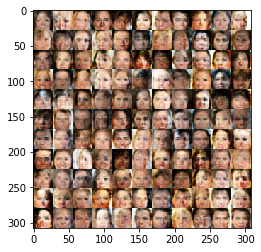

Epoch 1/1... Discriminator Loss: 1.2612... Generator Loss: 0.9257
Epoch 1/1... Discriminator Loss: 1.2210... Generator Loss: 0.9628
Epoch 1/1... Discriminator Loss: 1.2493... Generator Loss: 0.8539
Epoch 1/1... Discriminator Loss: 1.1501... Generator Loss: 1.0289
Epoch 1/1... Discriminator Loss: 1.5851... Generator Loss: 0.3952
Epoch 1/1... Discriminator Loss: 1.2886... Generator Loss: 0.7994
Epoch 1/1... Discriminator Loss: 1.2164... Generator Loss: 0.8637
Epoch 1/1... Discriminator Loss: 1.2353... Generator Loss: 0.7610
Epoch 1/1... Discriminator Loss: 1.5201... Generator Loss: 0.6885
Epoch 1/1... Discriminator Loss: 1.3144... Generator Loss: 0.9941


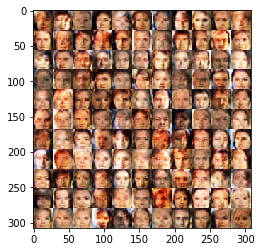

Epoch 1/1... Discriminator Loss: 1.3299... Generator Loss: 0.8390
Epoch 1/1... Discriminator Loss: 1.1768... Generator Loss: 1.4510
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.7720
Epoch 1/1... Discriminator Loss: 1.2969... Generator Loss: 0.6688
Epoch 1/1... Discriminator Loss: 1.2029... Generator Loss: 0.9760
Epoch 1/1... Discriminator Loss: 1.3618... Generator Loss: 0.8062
Epoch 1/1... Discriminator Loss: 1.2322... Generator Loss: 1.1494
Epoch 1/1... Discriminator Loss: 1.3351... Generator Loss: 0.8806
Epoch 1/1... Discriminator Loss: 1.4095... Generator Loss: 0.6129
Epoch 1/1... Discriminator Loss: 1.3124... Generator Loss: 0.8194


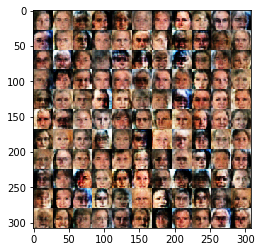

Epoch 1/1... Discriminator Loss: 1.2897... Generator Loss: 0.8948
Epoch 1/1... Discriminator Loss: 1.2442... Generator Loss: 1.1593
Epoch 1/1... Discriminator Loss: 1.2449... Generator Loss: 0.7986
Epoch 1/1... Discriminator Loss: 1.3766... Generator Loss: 0.8030
Epoch 1/1... Discriminator Loss: 1.3298... Generator Loss: 1.0523
Epoch 1/1... Discriminator Loss: 1.2819... Generator Loss: 0.6943
Epoch 1/1... Discriminator Loss: 0.9117... Generator Loss: 1.3894
Epoch 1/1... Discriminator Loss: 1.3412... Generator Loss: 0.6813
Epoch 1/1... Discriminator Loss: 1.2542... Generator Loss: 0.7502
Epoch 1/1... Discriminator Loss: 1.2161... Generator Loss: 1.0187


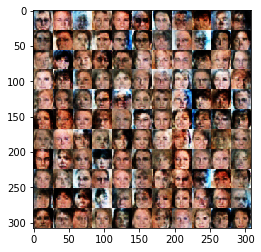

Epoch 1/1... Discriminator Loss: 1.4793... Generator Loss: 0.4619
Epoch 1/1... Discriminator Loss: 1.2503... Generator Loss: 1.0628
Epoch 1/1... Discriminator Loss: 1.0654... Generator Loss: 1.0748
Epoch 1/1... Discriminator Loss: 1.3225... Generator Loss: 1.2322
Epoch 1/1... Discriminator Loss: 1.2872... Generator Loss: 1.9475
Epoch 1/1... Discriminator Loss: 1.0302... Generator Loss: 1.3945
Epoch 1/1... Discriminator Loss: 1.2890... Generator Loss: 0.7638
Epoch 1/1... Discriminator Loss: 1.3133... Generator Loss: 0.8761


In [40]:
batch_size = 128
z_dim = 100
learning_rate = 0.0003
beta1 = 0.3


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### 提交项目
提交本项目前，确保运行所有 cells 后保存该文件。

保存该文件为 "dlnd_face_generation.ipynb"， 并另存为 HTML 格式 "File" -> "Download as"。提交项目时请附带 "helper.py" 和 "problem_unittests.py" 文件。